## Isadora Milanez, Manoela Busatto e Thiago Café

# Análise de Pesquisa de Mercado: Construtora JJ

<div id="indice"></div>

# Índice

1. [Introdução](#introducao)
 
 
2. [Tratamento da base de dados](#tratamento)
    - [2.1 Removendo valores nulos](#valores-nulos)
    - [2.2 Restaurando respostas das perguntas](#restaurando)
    - [2.3 Transformando variáveis qualitativas em quantitativas](#quali-quanti)
    - [2.4 Escolhendo variáveis para definir persona](#variaveis)


3. [Clusterização](#clusterizacao)
    - [3.1 Método do cotovelo](#metodo-cotovelo)
    - [3.2 Aplicando o modelo](#aplicando)
    - [3.3 Analisando características dos clusters](#analisando)
    - [3.4 Definindo cluster de interesse](#definindo)
    
4. [Conclusão](#conclusao)

-------
<div id="introducao"></div>

# 1. Introdução

Deseja-se cumprir o requisito do cliente Leonardo, da construtora JJ, que consiste em definir qual é a melhor opção de tipo de hotel para investir. Para isso, será analisada uma base de dados referente a uma pesquisa de mercado que contém respostas de possíveis clientes à algumas perguntas. A base de dados contém as seguintes variáveis:

- `P1` - Quantas vezes você costuma viajar por ano? 
- `P2` - Qual foi o princípal motivo de suas ultimas viagens?
- `P3` - O quão importante para você é a infraestrutura do hotel?
    - `P4` - Restaurante
    - `P5` - Jacuzi
    - `P6` - Bar 
    - `P7` - Lareira
    - `P8` - Decoração
    - `P9` - Piscina
    - `P10` - Sala de Jogos
    - `P11` - Spa
    - `P12` - Passeios
    - `P13` - Academia
    - `P14` - Cassino
    - `P15` - Quadra de Tênis
    - `P16` - Lavanderia
    - `P17` - Conforto
    - `P18` - Lojas no Hotel
    - `P19` - Qualidade Quarto
    - `P20` - Banheira
    - `P21` - Zoológico
    - `P22` - Ar condicionado
    - `P23` - Área verde
    - `P24` - Aquecedor
- `P25` - O quão importante para você é o entretenimento de um Hotel?
    - `P26` - Música Ao-Vivo
    - `P27` - Monitores para Crianças
    - `P28` - Ecoturismo
    - `P29` - Presença de TV Smart no quarto
    - `P30` - Passeios com guias
- `P31` - O quão importante para você é o serviço de um Hotel?
    - `P32` - Vaso sanitário com limpeza elétrica
    - `P33` - Vestimenta dos atendentes
    - `P34` - Certificação de qualidade
    - `P35` - Serviço de quarto
    - `P36` - Local apto para fumantes
    - `P37` - Limpeza diária
    - `P38` - Diversidade do frigobar
    - `P39` - Wi-Fi grátis
    - `P40` - Exclusividade
    - `P41` - Amabilidade dos atendentes
    - `P42` - Espaço Gourmet
    - `P43` - Cores fortes no quarto
    - `P44` - Check-in/Check-out agilizado
    - `P45` - Telefone grátis no quarto
    - `P46` - Qualidade dos vinhos do cardápio
    - `P47` - País de origem do fundador do hotel
    - `P48` - Som ambiente no quarto
    - `P49` - Cardápio Vegetariano
    - `P50` - Acústica do quarto
    - `P51` - Sanidade financeira da rede Hoteleira
    - `P52` - Concierge
    - `P53` - Snacks disponíveis no quarto
    - `P54` - Segurança
    - `P55` - Avaliações anteriores
    - `P56` - Reserva online
- `P57` - O quão importante é o preço do pacote ?
- `P58` - O quão importante são ofertas promocionais ?
- `Qesc` - Qual seu nível de escolaridade?
- `Qciv` - Qual seu estado civil?
- `Qnat` - Quantos filhos você tem?
- `Qtipcama` - Tipo de cama ?
- `Qest` - Quanto tempo é sua estadia média?
- `Qche` - Qual é o dia da sua chegada?
- `Qocup` - Qual é a sua principal ocupação?
- `Qid` - Idade
- `Qgen` - Gênero
- `Qreg` - Região
- `Qclasse` - Classe
- `Qs` - Qual você acha que é a finalidade dessa pesquisa?
  
 
 ** Perguntas P3 até P58 são respondidas de acordo com a importância delas ao cliente em uma escala de 1 a 7.**

Inicialmente, a base de dados passará por uma limpeza que remova eventuais problemas como caracteres errados e linhas ou colunas em branco. Após a limpeza, será iniciado o processo de `clusterização`, que permitirá a escolha de um público-alvo específico que representa determinado agrupamento de dados (cluster). Tal público-alvo construído com base em uma `persona` embasará a escolha de um tipo de hotel para investir.


In [16]:
# Importando bibliotecas 

%matplotlib inline 
import numpy as np
import pandas as pd
import os
import matplotlib as plt
from IPython.display import display
import math
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

In [17]:
# Removendo "warnings do código"

import warnings
warnings.filterwarnings('ignore')

In [18]:
# Verificando se a base de dados está na pasta

filename = 'Base - MindMiners.xlsx'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook!')
    
else:
    print(f'Não encontrei o arquivo {filename}')

Parece que o arquivo Base - MindMiners.xlsx está na mesma pasta do notebook!


In [19]:
df = pd.read_excel('Base - MindMiners.xlsx',sheet_name = 'Pesquisa-Respostas')

<div id="tratamento"></div>

# 2. Tratamento da base de dados

<div id="valores-nulos"></div>

## 2.1 Removendo valores nulos

In [20]:
# Retirando espaços nos nomes das colunas
df.columns = df.columns.str.strip()

In [21]:
# Ajustando o nome das colunas P7 e P20
df["P7"] = df[".P7"]
df = df.drop([".P7"], axis=1)
df["P20"] = df[".P20"]
df = df.drop([".P20"], axis=1)

In [22]:
# Verificando colunas nulas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 86 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   P1           991 non-null    float64
 2   P2           995 non-null    object 
 3   P3           994 non-null    float64
 4   P4           994 non-null    float64
 5   Unnamed: 5   111 non-null    float64
 6   P5           994 non-null    object 
 7   P6           992 non-null    object 
 8   P8           992 non-null    float64
 9   P9           992 non-null    object 
 10  Unnamed: 11  111 non-null    float64
 11  P10          991 non-null    float64
 12  P11          991 non-null    float64
 13  P12          992 non-null    object 
 14  P13          992 non-null    float64
 15  Unnamed: 16  111 non-null    float64
 16  P14          992 non-null    float64
 17  P15          991 non-null    float64
 18  Unnamed: 19  111 non-null    float64
 19  P16   

In [23]:
# Calculando o número de valores nulos por coluna
df.isnull().sum()

Unnamed: 0    1268
P1             277
P2             273
P3             274
P4             274
              ... 
Qreg           277
Qclasse        277
Qs             302
P7             275
P20            277
Length: 86, dtype: int64

In [24]:
# Retirando colunas extras (que não possuem variáveis)
df_dropped = df.loc[:,["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10","P11","P12","P13","P14","P15","P16","P17","P18","P19","P20","P21","P22","P23","P24","P25","P26","P27","P28","P29","P30","P31","P32","P33","P34","P35","P36","P37","P38","P39","P40","P41","P42","P43","P44","P45","P46","P47","P48","P49","P50","P51","P52","P53","P54","P55","P56","P57","P58","Qesc","Qciv","Qnat","Qtipcama","Qcama","Qest","Qche","Qocup","Qid","Qgen","Qreg","Qclasse"]]

In [25]:
# Retirando linhas com algum valor nulo
df_dropped_NA = df_dropped.dropna(how = "any")

<AxesSubplot:>

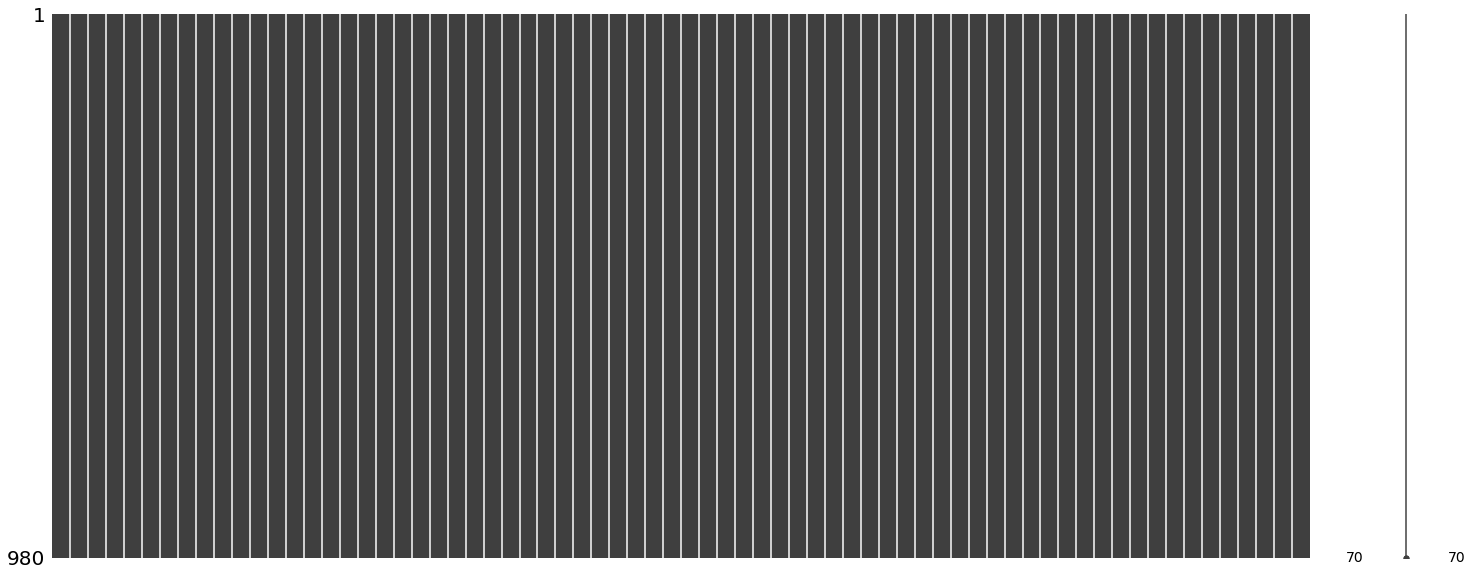

In [26]:
# Instalando biblioteca missingno para visualização de valores nulos e importando
# Se não rodar, utilizar "pip install missingno"
import missingno as msno

#Visualizando espaçamento dos valores nulos nas colunas pela função matrix()
msno.matrix(df_dropped_NA)

<div id="restaurando"></div>

## 2.2 Restaurando respostas das perguntas

In [27]:
# Arrumando respostas P1
df_dropped_NA["P1"] = df_dropped_NA["P1"].replace([7.0,6.0],[3,2])
df_dropped_NA["P1"] = df_dropped_NA["P1"].replace([5.0],[0]) # Quem responde 5 não viaja

# Arrumando respostas P6 e transformando e nulo para retirar posteriormente
df_dropped_NA["P6"] = df_dropped_NA["P6"].replace([" "],[0])
df_dropped_NA["P6"][df_dropped_NA["P6"] == 0] = np.nan
df_dropped_NA["P6"].value_counts(dropna=False)

# Arrumando respostas P18
df_dropped_NA['P18']=df_dropped_NA['P18'].astype(str)
df_dropped_NA["P18"].value_counts(dropna=False)
df_dropped_NA["P18"] = df_dropped_NA["P18"].replace(["1900-01-05 00:00:00"],["5"])
df_dropped_NA["P18"] = df_dropped_NA["P18"].replace(["1900-01-01 00:00:00"],["1"])
df_dropped_NA["P18"].value_counts(dropna=False)

# Arrumando respostas P19
df_dropped_NA['P19']=df_dropped_NA['P19'].astype(str)
df_dropped_NA["P19"] = df_dropped_NA["P19"].replace(["1900-01-03 00:00:00"],["3"])
df_dropped_NA["P19"] = df_dropped_NA["P19"].replace(["1900-01-06 00:00:00"],["6"])
df_dropped_NA["P19"].value_counts(dropna=False)

# Arrumando respostas P20
df_dropped_NA['P20']=df_dropped_NA['P20'].astype(str)
df_dropped_NA["P20"] = df_dropped_NA["P20"].replace(["1900-01-01 00:00:00"],["1"])
df_dropped_NA["P20"] = df_dropped_NA["P20"].replace(["1900-01-04 00:00:00"],["4"])
df_dropped_NA["P20"].value_counts(dropna=False)

# Arrumando respostas P21
df_dropped_NA['P21']=df_dropped_NA['P21'].astype(str)
df_dropped_NA["P21"] = df_dropped_NA["P21"].replace(["1900-01-02 00:00:00"],["2"])
df_dropped_NA["P21"] = df_dropped_NA["P21"].replace(["1900-01-03 00:00:00"],["3"])
df_dropped_NA["P21"] = df_dropped_NA["P21"].replace(["1900-01-04 00:00:00"],["4"])
df_dropped_NA["P21"] = df_dropped_NA["P21"].replace(["1900-01-06 00:00:00"],["6"])
df_dropped_NA["P21"] = df_dropped_NA["P21"].replace(["1900-01-07 00:00:00"],["7"])
df_dropped_NA["P21"].value_counts(dropna=False)

# Arrumando respostas P22
df_dropped_NA['P22']=df_dropped_NA['P22'].astype(str)
df_dropped_NA["P22"] = df_dropped_NA["P22"].replace(["1900-01-01 00:00:00"],["1"])
df_dropped_NA["P22"] = df_dropped_NA["P22"].replace(["1900-01-03 00:00:00"],["3"])
df_dropped_NA["P22"] = df_dropped_NA["P22"].replace(["1900-01-07 00:00:00"],["7"])
df_dropped_NA["P22"].value_counts(dropna=False)

# Arrumando respostas P23
df_dropped_NA['P23']=df_dropped_NA['P23'].astype(str)
df_dropped_NA["P23"] = df_dropped_NA["P23"].replace(["1900-01-05 00:00:00"],["5"])
df_dropped_NA["P23"] = df_dropped_NA["P23"].replace(["1900-01-02 00:00:00"],["2"])
df_dropped_NA["P23"] = df_dropped_NA["P23"].replace(["1900-01-01 00:00:00"],["1"])
df_dropped_NA["P23"].value_counts(dropna=False)

# Arrumando respostas P43 e transformando em nulo valores incoerentes para retirar posteriormente
df_dropped_NA["P43"] = df_dropped_NA["P43"].replace([1234567890987650000],[0])
df_dropped_NA["P43"][df_dropped_NA["P43"] == 0] = np.nan
df_dropped_NA["P43"].value_counts(dropna=False)

# Arrumando respostas P55 e transformando em nulo valores incoerentes para retirar posteriormente
df_dropped_NA["P55"] = df_dropped_NA["P55"].replace([1.23456789098765e+36],[0])
df_dropped_NA["P55"][df_dropped_NA["P55"] == 0] = np.nan
df_dropped_NA["P55"].value_counts(dropna=False)

# Arrumando respostas Qesc
df_dropped_NA["Qesc"] = df_dropped_NA["Qesc"].replace([7],[6])

# Arrumando respostas Qnat
# 1-(0 filhos), 2-(1-2 filhos), 3 -(3-4 filhos), 4-(5+ filhos)
df_dropped_NA["Qnat"][df_dropped_NA["Qnat"] > 12] = np.nan
df_dropped_NA["Qnat"] = df_dropped_NA["Qnat"].replace([0,1,2,3,4],[1,2,2,3,3])
df_dropped_NA["Qnat"][df_dropped_NA["Qnat"] >= 5] = 4
df_dropped_NA["Qnat"].value_counts(dropna=False)

# Arrumando respostas Qcama
df_dropped_NA["Qcama"][df_dropped_NA["Qcama"] > 12] = np.nan

# Arrumando respostas Qche
df_dropped_NA["Qche"] = df_dropped_NA["Qche"].replace(["quinta-Feira","Quinta Feira","quintaFeira"],["Quinta-Feira","Quinta-Feira","Quinta-Feira"])

In [28]:
# Removendo valores nulos referentes as respostas incoerentes
df_limpo = df_dropped_NA.dropna(how = "any")

In [29]:
# Transformando valores quantitativos em float e qualitativos em object
df_limpo["P2"] = df_limpo["P2"].astype(float)
df_limpo["P5"] = df_limpo["P5"].astype(float)
df_limpo["P7"] = df_limpo["P7"].astype(float)
df_limpo["P9"] = df_limpo["P9"].astype(float)
df_limpo["P12"] = df_limpo["P12"].astype(float)
df_limpo["P18"] = df_limpo["P18"].astype(float)
df_limpo["P19"] = df_limpo["P19"].astype(float)
df_limpo["P20"] = df_limpo["P20"].astype(float)
df_limpo["P21"] = df_limpo["P21"].astype(float)
df_limpo["P22"] = df_limpo["P22"].astype(float)
df_limpo["P23"] = df_limpo["P23"].astype(float)
df_limpo["Qesc"] = df_limpo["Qesc"].astype(object)
df_limpo["Qocup"] = df_limpo["Qocup"].astype(object)

In [30]:
# Transformando valores em respostas categóricas
df_limpo["P2"] = df_limpo["P2"].replace([1,2,3,4,5,6,7,8],["Visitar_amigos","Visitar_familia","Lazer","Pesquisa_Científica","Trabalho", "Viagem_gastronômica","Desconectar","Não_viajei"])
df_limpo["Qesc"] = df_limpo["Qesc"].replace([1,2,3,4,5,6],["EF_incompleto","EF_completo","EM_incompleto","EM_completo","ES_incompleto", "ES_completo"])
df_limpo["Qciv"] = df_limpo["Qciv"].replace([1,2,3,4,5],["Solteiro","Casado","Separado","Divorciado","Viúvo"])
df_limpo["Qocup"] = df_limpo["Qocup"].replace([1,2,3,4,5,6],["Meio_tempo","Tempo_integral","Desempregado","Autonomo","Estudante", "Aposentado"])
df_limpo["Qid"] = df_limpo["Qid"].replace([1,2,3,4,5,6],["-18","18-24","25-34","35-44","45-54", "55+"])
df_limpo["Qgen"] = df_limpo["Qgen"].replace([1,2],["Masculino","Feminino"])
df_limpo["Qreg"] = df_limpo["Qreg"].replace([1,2,3,4,5],["Sudeste","Sul","Centro_Oeste","Nordeste","Norte"])

<div id="quali-quanti"></div>

## 2.3 Transformando variáveis qualitativas em quantitativas

In [31]:
# Importando do sklearn para aplicação do OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer




# Selecionando variaveis qualitativas a serem transformadas
transformer = make_column_transformer(
    (OneHotEncoder(), ['P2',"Qesc","Qciv","Qocup","Qid","Qgen","Qreg","Qclasse"]),
    remainder='passthrough')


transformed = transformer.fit_transform(df_limpo)
df_to_model_2 = pd.DataFrame(transformed, columns=transformer.get_feature_names())
df_to_model_2

,onehotencoder__x0_Desconectar,onehotencoder__x0_Lazer,onehotencoder__x0_Pesquisa_Científica,onehotencoder__x0_Trabalho,onehotencoder__x0_Viagem_gastronômica,onehotencoder__x0_Visitar_amigos,onehotencoder__x0_Visitar_familia,onehotencoder__x1_EF_completo,onehotencoder__x1_EF_incompleto,onehotencoder__x1_EM_completo,...,P54,P55,P56,P57,P58,Qnat,Qtipcama,Qcama,Qest,Qche
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,2.0,5.0,5.0,1.0,Viuvo,1.0,4.0,Sábado
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,4.0,3.0,2.0,2.0,1.0,2.0,Solteiro,1.0,1.0,Quinta-Feira
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,6.0,7.0,5.0,7.0,1.0,Viuvo,1.0,3.0,Sábado
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.0,2.0,6.0,4.0,3.0,Casado,1.0,6.0,Terça-Feira
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2.0,3.0,2.0,5.0,2.0,Casado,1.0,4.0,Quinta-Feira
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,4.0,4.0,1.0,2.0,Viuvo,1.0,4.0,Quinta-Feira
958,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,5.0,1.0,4.0,7.0,3.0,Solteiro,6.0,2.0,Terça-Feira
959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,6.0,1.0,7.0,4.0,2.0,Solteiro,2.0,6.0,Domingo
960,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,7.0,5.0,2.0,7.0,1.0,Casado,2.0,3.0,Quinta-Feira


<div id="variaveis"></div>

## 2.4 Escolhendo variáveis para definir persona

Para definir a persona em questão, descartou-se algumas perguntas que não fariam sentido para o processo de clusterização. A clusterização visa separar grupos de pessoas e não seus interesses específicos, isso porque, após esse processo, será possível analisar as preferências de cada grupo.
Portanto, as variáveis em que a clusterização será baseada são:
- `P1` - Quantas vezes você costuma viajar por ano? 
- `P2` - Qual foi o princípal motivo de suas ultimas viagens?
- `Qesc` - Qual seu nível de escolaridade?
- `Qciv` - Qual seu estado civil?
- `Qnat` - Quantos filhos você tem?
- `Qocup` - Qual é a sua principal ocupação?
- `Qid` - Idade
- `Qgen` - Gênero
- `Qreg` - Região
- `Qclasse` - Classe

In [32]:
# Removendo variáveis que não serão utilizadas para definir a persona
X_k = df_to_model_2.drop(["Qche","Qest","Qtipcama","Qcama","P4","P5","P6","P7","P8","P9","P10","P11","P12","P13","P14","P15","P16","P17","P18","P19","P20","P21","P22","P23","P24","P26","P27","P28","P29","P30","P32","P33","P34","P35","P36","P37","P38","P39","P40","P41","P42","P43","P44","P45","P46","P47","P48","P49","P50","P51","P52","P53","P54","P55","P56","P58","P3","P25","P31","P57"], axis=1)

<div id="clusterizacao"></div>

# 3. Clusterização

<div id="metodo-cotovelo"></div>

## 3.1 Método do cotovelo

O método de clusterização que será utilizado é chamado Kmeans. Esse método, de forma resumida, interpreta cada linha de um dataframe como diferentes "pontos" e realiza um cálculo de distância entre cada um deles. A partir disso, ele agrupa os pontos de acordo com o número de clusters previamente definido e determina centros, ou seja, médias de cada um dos grupos (clusters).

O método do cotovelo visa definir a melhor quantidade de clusters que serão utilizados para realizar o Kmeans. 

In [41]:
#Importando o modelo Kmeans da biblioteca Scikit Learn
from sklearn.cluster import KMeans

#Método do cotovelo - Aplicando o modelo Kmeans para diferentes numeros de clusters
cs = []
for i in range(1, 12):
    cs.append(KMeans(n_clusters = i, max_iter = 10000, n_init = 100, random_state = 0).fit(X_k).inertia_)
plt.plot(range(1, 12), cs, color="red")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

<div id="aplicando"></div>

## 3.2 Aplicando o modelo 

Como pode ser observado pelo gráfico acima, o momento em que o diametro dos clusters passa a ter uma mudança significantemente menor é a partir do cluster 3. Portanto, esse é o número de clusters ideal para a modelagem.

In [33]:

#Definindo o número de clusters do modelo de acordo com o valor mostrado pelo método do cotovelo
kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(X_k)

KMeans(n_clusters=3, random_state=0)

In [34]:
clus = kmeans.fit_predict(X_k)

In [36]:
centroids = kmeans.cluster_centers_

In [39]:
from sklearn.metrics import silhouette_score

#Utilizando métrica da silhouette_score para avaliar a clusterização
silhouette_ = silhouette_score(X_k, clus)

print(silhouette_)

0.13399614617647393


In [42]:
X_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   onehotencoder__x0_Desconectar          962 non-null    object
 1   onehotencoder__x0_Lazer                962 non-null    object
 2   onehotencoder__x0_Pesquisa_Científica  962 non-null    object
 3   onehotencoder__x0_Trabalho             962 non-null    object
 4   onehotencoder__x0_Viagem_gastronômica  962 non-null    object
 5   onehotencoder__x0_Visitar_amigos       962 non-null    object
 6   onehotencoder__x0_Visitar_familia      962 non-null    object
 7   onehotencoder__x1_EF_completo          962 non-null    object
 8   onehotencoder__x1_EF_incompleto        962 non-null    object
 9   onehotencoder__x1_EM_completo          962 non-null    object
 10  onehotencoder__x1_EM_incompleto        962 non-null    object
 11  onehotencoder__x1_E

In [45]:
# Adicionando o cluster como coluna na base de dados, possibilitando a análise de cada grupo
kmeans = KMeans(n_clusters=3, max_iter = 10000, n_init = 100, random_state = 0) 
clus = kmeans.fit_predict(X_k)

df_limpo.loc[:, 'cluster'] = clus
df_limpo

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Qtipcama,Qcama,Qest,Qche,Qocup,Qid,Qgen,Qreg,Qclasse,cluster
0,2.0,Desconectar,7.0,5.0,4.0,2.0,6.0,7.0,5.0,1.0,...,Viuvo,1.0,4.0,Sábado,Tempo_integral,55+,Masculino,Sul,B,1
1,3.0,Visitar_familia,2.0,6.0,4.0,2.0,5.0,1.0,3.0,2.0,...,Solteiro,1.0,1.0,Quinta-Feira,Tempo_integral,55+,Masculino,Norte,B,2
2,1.0,Desconectar,7.0,5.0,4.0,5.0,6.0,6.0,5.0,2.0,...,Viuvo,1.0,3.0,Sábado,Desempregado,35-44,Masculino,Sul,B,1
3,1.0,Lazer,4.0,4.0,6.0,6.0,1.0,7.0,6.0,6.0,...,Casado,1.0,6.0,Terça-Feira,Desempregado,-18,Feminino,Sul,B,0
4,2.0,Desconectar,6.0,7.0,3.0,3.0,7.0,6.0,5.0,2.0,...,Casado,1.0,4.0,Quinta-Feira,Aposentado,18-24,Masculino,Sul,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,2.0,Lazer,7.0,5.0,4.0,3.0,6.0,3.0,5.0,1.0,...,Viuvo,1.0,4.0,Quinta-Feira,Aposentado,45-54,Feminino,Sul,A,1
1262,3.0,Trabalho,3.0,6.0,7.0,6.0,4.0,4.0,7.0,2.0,...,Solteiro,6.0,2.0,Terça-Feira,Autonomo,25-34,Masculino,Centro_Oeste,A,2
1263,2.0,Lazer,7.0,6.0,6.0,6.0,2.0,4.0,7.0,5.0,...,Solteiro,2.0,6.0,Domingo,Estudante,45-54,Feminino,Sudeste,A,1
1265,2.0,Desconectar,6.0,6.0,4.0,5.0,6.0,6.0,5.0,1.0,...,Casado,2.0,3.0,Quinta-Feira,Autonomo,45-54,Feminino,Sudeste,A,1


In [46]:
# Adicionando o cluster como coluna na base de dados que contém apenas as colunas utilizadas no modelo
# Possibilitando a análise de cada grupo
df_to_model_2.loc[:, 'cluster'] = clus
df_to_model_2

,onehotencoder__x0_Desconectar,onehotencoder__x0_Lazer,onehotencoder__x0_Pesquisa_Científica,onehotencoder__x0_Trabalho,onehotencoder__x0_Viagem_gastronômica,onehotencoder__x0_Visitar_amigos,onehotencoder__x0_Visitar_familia,onehotencoder__x1_EF_completo,onehotencoder__x1_EF_incompleto,onehotencoder__x1_EM_completo,...,P55,P56,P57,P58,Qnat,Qtipcama,Qcama,Qest,Qche,cluster
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,5.0,5.0,1.0,Viuvo,1.0,4.0,Sábado,1
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,2.0,2.0,1.0,2.0,Solteiro,1.0,1.0,Quinta-Feira,2
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,7.0,5.0,7.0,1.0,Viuvo,1.0,3.0,Sábado,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,6.0,4.0,3.0,Casado,1.0,6.0,Terça-Feira,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,2.0,5.0,2.0,Casado,1.0,4.0,Quinta-Feira,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,4.0,1.0,2.0,Viuvo,1.0,4.0,Quinta-Feira,1
958,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,1.0,4.0,7.0,3.0,Solteiro,6.0,2.0,Terça-Feira,2
959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,6.0,1.0,7.0,4.0,2.0,Solteiro,2.0,6.0,Domingo,1
960,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,5.0,2.0,7.0,1.0,Casado,2.0,3.0,Quinta-Feira,1


In [47]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
#data = load_digits().data
#pca = PCA(2)
 
#Transform the data
#df = pca.fit_transform(data)
 
#Import KMeans module
#from sklearn.cluster import KMeans
#Initialize the class object
#kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(X_k)
 
#Getting unique labels
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_
 
#plotting the results:
for i in u_labels:
    plt.scatter(X_k[label == i , 0] , X_k[label == i , 1] , label= i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

InvalidIndexError: (array([False, False, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False,  True, False, False,  True,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True,  True,  True, False, False, False, False,  True, False,
        True,  True, False,  True,  True, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
        True,  True, False, False,  True, False,  True,  True, False,
        True,  True, False,  True,  True, False,  True, False,  True,
        True, False,  True, False, False, False, False, False,  True,
       False, False,  True, False,  True, False, False, False, False,
        True, False,  True, False,  True,  True, False, False, False,
        True,  True, False,  True, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False,  True, False,
        True, False, False, False,  True,  True, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False,  True,  True, False,  True,  True, False, False, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True,  True, False, False,  True, False,  True,  True, False,
       False,  True,  True, False, False,  True,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True, False, False,  True,  True,  True, False, False,
       False,  True, False,  True, False, False, False,  True, False,
        True, False,  True, False, False,  True,  True, False, False,
       False, False,  True,  True,  True, False, False, False, False,
        True, False,  True,  True, False, False,  True,  True, False,
        True, False, False, False, False, False, False,  True,  True,
       False, False,  True,  True, False, False, False, False,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True, False, False,  True,
       False,  True,  True, False, False,  True,  True, False, False,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False,  True, False,  True,  True, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
        True, False, False, False,  True, False,  True,  True, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True, False,  True, False, False, False,  True, False,  True,
       False,  True, False, False,  True, False, False, False, False,
        True, False, False, False,  True, False,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False,  True, False,  True,  True,  True, False,
        True, False,  True,  True,  True, False, False,  True, False,
       False,  True,  True,  True,  True, False,  True, False, False,
       False, False,  True, False,  True, False,  True, False, False,
       False, False,  True, False, False, False, False,  True,  True,
        True, False,  True,  True, False, False,  True, False, False,
       False, False,  True,  True, False, False,  True,  True, False,
       False, False,  True, False, False,  True,  True, False,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False,  True,  True,  True, False,  True, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True,  True, False, False,
       False,  True, False,  True, False, False,  True,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False,  True, False, False, False,  True,
        True, False, False, False, False,  True, False,  True, False,
        True, False, False,  True,  True, False,  True,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False, False, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False,  True,  True, False, False,
       False,  True, False,  True, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True,  True,  True, False,  True, False,  True, False, False,
       False,  True,  True, False, False, False, False,  True,  True,
       False, False, False,  True, False,  True,  True, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True,  True, False, False, False,  True,  True,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True,  True, False,  True,  True, False,  True, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False,  True, False, False,  True,  True, False, False,
        True,  True, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True, False, False, False,  True, False, False,  True,
        True, False,  True, False, False, False, False,  True,  True,
       False, False, False, False,  True,  True, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False,  True, False,
       False,  True, False, False,  True, False,  True,  True,  True,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False]), 0)

<div id="analisando"></div>

## 3.3 Analisando características dos clusters

In [48]:
# Função que demonstra porcentagens (qualitativas) e média (quantitativas)
# Printando para visualizar as características de cada um dos os clusters

for col in df_limpo.drop('cluster', axis=1).columns:
    for cl in np.sort(df_limpo.cluster.unique()):
        if df_limpo.dtypes[col] == object:
            vc = 100*df_limpo.loc[df_limpo.cluster==cl,col].value_counts()/(df_limpo.cluster==cl).sum()
            for cat, cnt in vc.reset_index().values:
                print(f'{cl:d}; {col}_{str(cat):s}; {cnt:5.2f}%'.replace('.', ','))
        else:      
            print(f'{cl:d}; {col};{df_limpo.loc[df_limpo.cluster==cl, col].mean():.2f}'.replace('.', ','))
            
# Função que demonstra porcentagens (qualitativas) e média (quantitativas) 
# Printando para visualizar as características da a base completa para comparar com os clusters
for col in df_limpo.drop('cluster', axis=1).columns:
    if df_limpo.dtypes[col] == object:
        vc = 100*df_limpo.loc[:, col].value_counts()/(df_limpo.shape[0])
        for cat, cnt in vc.reset_index().values:
            print(f'All; {col}_{str(cat):s}; {cnt:5.2f}%'.replace('.', ','))
    else:      
        print(f'All; {col};{df_limpo.loc[:, col].mean():.2f}'.replace('.', ','))

0; P1;1,30
1; P1;1,47
2; P1;3,87
0; P2_Lazer; 50,68%
0; P2_Visitar_familia; 28,22%
0; P2_Desconectar; 15,62%
0; P2_Viagem_gastronômica;  2,19%
0; P2_Visitar_amigos;  1,10%
0; P2_Pesquisa_Científica;  1,10%
0; P2_Trabalho;  1,10%
1; P2_Lazer; 54,92%
1; P2_Desconectar; 38,86%
1; P2_Visitar_familia;  4,92%
1; P2_Visitar_amigos;  0,52%
1; P2_Pesquisa_Científica;  0,52%
1; P2_Viagem_gastronômica;  0,26%
2; P2_Trabalho; 55,45%
2; P2_Visitar_familia; 26,54%
2; P2_Visitar_amigos;  9,00%
2; P2_Pesquisa_Científica;  2,84%
2; P2_Desconectar;  2,84%
2; P2_Lazer;  1,90%
2; P2_Viagem_gastronômica;  1,42%
0; P3;3,89
1; P3;5,51
2; P3;3,91
0; P4;3,86
1; P4;5,44
2; P4;4,08
0; P5;4,06
1; P5;4,88
2; P5;4,17
0; P6;5,89
1; P6;4,08
2; P6;1,91
0; P7;2,55
1; P7;5,51
2; P7;2,04
0; P8;4,29
1; P8;4,27
2; P8;3,88
0; P9;6,07
1; P9;5,22
2; P9;1,87
0; P10;4,11
1; P10;2,15
2; P10;1,99
0; P11;3,62
1; P11;5,33
2; P11;1,91
0; P12;4,09
1; P12;2,15
2; P12;2,10
0; P13;4,69
1; P13;1,91
2; P13;2,70
0; P14;4,02
1; P14;2,04
2; 

In [49]:
#Verificando qual cluster aparece mais em porcentagem
df_to_model_2['cluster'].value_counts(normalize= True)

1    0.401247
0    0.379418
2    0.219335
Name: cluster, dtype: float64

In [50]:
X_k.loc[:, 'cluster'] = clus

In [51]:
#Verificando qual cluster aparece mais valores absolutos
X_k['cluster'].value_counts()

1    386
0    365
2    211
Name: cluster, dtype: int64

In [52]:
# Observando os clusters apenas com o dataframe com as perguntas selecionadas (X_k)

# Função que demonstra porcentagens (qualitativas) e média (quantitativas)
# Printando para visualizar as características de cada um dos os clusters
for col in X_k.drop('cluster', axis=1).columns:
    for cl in np.sort(X_k.cluster.unique()):
        if X_k.dtypes[col] == object:
            vc = 100*X_k.loc[X_k.cluster==cl,col].value_counts()/(X_k.cluster==cl).sum()
            for cat, cnt in vc.reset_index().values:
                print(f'{cl:d}; {col}_{str(cat):s}; {cnt:5.2f}%'.replace('.', ','))
        else:      
            print(f'{cl:d}; {col};{X_k.loc[X_k.cluster==cl, col].mean():.2f}'.replace('.', ','))
            
# Função que demonstra porcentagens (qualitativas) e média (quantitativas) 
# Printando para visualizar as características da a base completa para comparar com os clusters            
for col in X_k.drop('cluster', axis=1).columns:
    if X_k.dtypes[col] == object:
        vc = 100*X_k.loc[:, col].value_counts()/(X_k.shape[0])
        for cat, cnt in vc.reset_index().values:
            print(f'All; {col}_{str(cat):s}; {cnt:5.2f}%'.replace('.', ','))
    else:      
        print(f'All; {col};{X_k.loc[:, col].mean():.2f}'.replace('.', ','))

0; onehotencoder__x0_Desconectar_0,0; 84,38%
0; onehotencoder__x0_Desconectar_1,0; 15,62%
1; onehotencoder__x0_Desconectar_0,0; 61,14%
1; onehotencoder__x0_Desconectar_1,0; 38,86%
2; onehotencoder__x0_Desconectar_0,0; 97,16%
2; onehotencoder__x0_Desconectar_1,0;  2,84%
0; onehotencoder__x0_Lazer_1,0; 50,68%
0; onehotencoder__x0_Lazer_0,0; 49,32%
1; onehotencoder__x0_Lazer_1,0; 54,92%
1; onehotencoder__x0_Lazer_0,0; 45,08%
2; onehotencoder__x0_Lazer_0,0; 98,10%
2; onehotencoder__x0_Lazer_1,0;  1,90%
0; onehotencoder__x0_Pesquisa_Científica_0,0; 98,90%
0; onehotencoder__x0_Pesquisa_Científica_1,0;  1,10%
1; onehotencoder__x0_Pesquisa_Científica_0,0; 99,48%
1; onehotencoder__x0_Pesquisa_Científica_1,0;  0,52%
2; onehotencoder__x0_Pesquisa_Científica_0,0; 97,16%
2; onehotencoder__x0_Pesquisa_Científica_1,0;  2,84%
0; onehotencoder__x0_Trabalho_0,0; 98,90%
0; onehotencoder__x0_Trabalho_1,0;  1,10%
1; onehotencoder__x0_Trabalho_0,0; 100,00%
2; onehotencoder__x0_Trabalho_1,0; 55,45%
2; onehot

<div id="definindo"></div>

## 3.4 Definindo cluster de interesse

A partir da análise de cada um dos clusteres separadamente, optou-se pelo cluster 1, pois, além de representar uma maior parte da base de dados que as demais ( 1 - 40,1%; 0 - 37,9%; 2 - 21,9%), tem características dominantes em algumas variáveis. Ou seja, essa alta porcentagem em perguntas referentes a características do grupo permite uma maior inclusão das pessoas do cluster na definição da persona. Das 8 perguntas qualitativas que foram utilizadas no modelo, comparando as respostas mais frequentes de cada cluster, o cluster tem porcentagem maior em 5 das 8 perguntas. Sendo que, quando não é a maior, fica pouquíssimo atrás:
- Para `P2` o cluster 2 tem a maior porcentagem da sua resposta mais frequente:
    - no cluster 0 a maioria viaja à lazer, 50,7% das pessoas
    - no cluster 1 a maioria viaja à lazer, 54,92% das pessoas
    - no cluster 2 a maioria viaja à trabalho, 55,4% das pessoas
    
- Para `Qesc` o cluster 1 tem a maior porcentagem da sua resposta mais frequente:
    - no cluster 0 a maioria tem EM completo, 20,8% das pessoas
    - no cluster 1 a maioria tem ES completo, 44,6% das pessoas
    - no cluster 2 a maioria tem EF incompleto, 21,8% das pessoas
- Para `Qciv` o cluster 1 tem a maior porcentagem da sua resposta mais frequente:
    - no cluster 0 a maioria é divorciada, 33,97% das pessoas
    - no cluster 1 a maioria é casada, 89,9% das pessoas
    - no cluster 2 a maioria é casada, 23,2% das pessoas
- Para `Qocup` o cluster 1 tem a maior porcentagem da sua resposta mais frequente:
    - no cluster 0 a maioria é aposentada, 20,5% das pessoas
    - no cluster 1 a maioria é estudante, 21,8% das pessoas
    - no cluster 2 a maioria é aposentada, 21,3% das pessoas
- Para `Qid` o cluster 0 tem a maior porcentagem da sua resposta mais frequente:
    - no cluster 0 a maioria tem entre 18 e 24 anos, 23,8% das pessoas
    - no cluster 1 a maioria tem entre 35 e 44 anos, 22,3% das pessoas
    - no cluster 2 a maioria tem entre 45 e 54 anos, 22,7% das pessoas
- Para `Qgen` o cluster 1 tem a maior porcentagem da sua resposta mais frequente:
    - no cluster 0 a maioria é do genero Masculino, 50,4%% das pessoas
    - no cluster 1 a maioria é do genero Feminino, 51,8% das pessoas
    - no cluster 2 a maioria é do genero Masculino, 50,2% das pessoas
- Para `Qreg` o cluster 1 tem a maior porcentagem da sua resposta mais frequente:
    - no cluster 0 a maioria é do Norte, 23,0% das pessoas
    - no cluster 1 a maioria é do Sudeste, 41,5% das pessoas
    - no cluster 2 a maioria é do Sul, 26,5% das pessoas
- Para `Qclasse` o cluster 2 tem a maior porcentagem da sua resposta mais frequente:
    - no cluster 0 a maioria é de classe A, 52,9% das pessoas
    - no cluster 1 a maioria é de classe A, 78,8% das pessoas
    - no cluster 2 a maioria é de classe B, 81,0% das pessoas

In [57]:
# Criando data frame apenas com o cluster 0
filtro = df_['cluster'] == 0
df_0 = df_limpo.loc[filtro]
df_0

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Qtipcama,Qcama,Qest,Qche,Qocup,Qid,Qgen,Qreg,Qclasse,cluster
3,1.0,Lazer,4.0,4.0,6.0,6.0,1.0,7.0,6.0,6.0,...,Casado,1.0,6.0,Terça-Feira,Desempregado,-18,Feminino,Sul,B,0
5,1.0,Visitar_familia,2.0,4.0,5.0,7.0,2.0,3.0,7.0,6.0,...,Casado,3.0,6.0,Terça-Feira,Estudante,35-44,Feminino,Norte,A,0
6,2.0,Visitar_amigos,4.0,7.0,4.0,5.0,5.0,4.0,1.0,4.0,...,Casado,2.0,2.0,Quinta-Feira,Autonomo,25-34,Feminino,Centro_Oeste,B,0
8,2.0,Visitar_familia,4.0,1.0,1.0,6.0,1.0,4.0,7.0,5.0,...,Casado,2.0,6.0,Terça-Feira,Desempregado,25-34,Masculino,Norte,A,0
16,1.0,Visitar_familia,2.0,3.0,1.0,6.0,1.0,5.0,7.0,6.0,...,Solteiro,0.0,6.0,Terça-Feira,Aposentado,45-54,Feminino,Norte,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,1.0,Trabalho,5.0,3.0,2.0,4.0,6.0,5.0,1.0,3.0,...,Casado,9.0,3.0,Sexta-Feira,Meio_tempo,35-44,Masculino,Sul,B,0
1248,1.0,Desconectar,3.0,4.0,3.0,7.0,3.0,5.0,6.0,1.0,...,Viuvo,1.0,3.0,Sexta-Feira,Desempregado,35-44,Masculino,Norte,A,0
1249,1.0,Visitar_familia,3.0,7.0,7.0,6.0,1.0,4.0,6.0,7.0,...,Casado,4.0,6.0,Terça-Feira,Tempo_integral,45-54,Feminino,Sul,A,0
1251,1.0,Lazer,3.0,2.0,4.0,7.0,1.0,4.0,6.0,5.0,...,Solteiro,0.0,6.0,Terça-Feira,Autonomo,18-24,Masculino,Nordeste,B,0


In [58]:
# Criando data frame apenas com o cluster 1
filtro = df_['cluster'] == 1
df_1 = df_limpo.loc[filtro]
df_1

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Qtipcama,Qcama,Qest,Qche,Qocup,Qid,Qgen,Qreg,Qclasse,cluster
0,2.0,Desconectar,7.0,5.0,4.0,2.0,6.0,7.0,5.0,1.0,...,Viuvo,1.0,4.0,Sábado,Tempo_integral,55+,Masculino,Sul,B,1
2,1.0,Desconectar,7.0,5.0,4.0,5.0,6.0,6.0,5.0,2.0,...,Viuvo,1.0,3.0,Sábado,Desempregado,35-44,Masculino,Sul,B,1
4,2.0,Desconectar,6.0,7.0,3.0,3.0,7.0,6.0,5.0,2.0,...,Casado,1.0,4.0,Quinta-Feira,Aposentado,18-24,Masculino,Sul,A,1
7,1.0,Lazer,2.0,1.0,1.0,7.0,2.0,2.0,6.0,5.0,...,Casado,2.0,6.0,Terça-Feira,Meio_tempo,18-24,Feminino,Sul,B,1
14,2.0,Desconectar,5.0,7.0,7.0,5.0,7.0,2.0,5.0,1.0,...,Casado,1.0,4.0,Sexta-Feira,Autonomo,45-54,Masculino,Sudeste,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,1.0,Desconectar,7.0,6.0,6.0,5.0,4.0,1.0,6.0,2.0,...,Viuvo,1.0,3.0,Sexta-Feira,Aposentado,-18,Masculino,Centro_Oeste,A,1
1261,2.0,Lazer,7.0,5.0,4.0,3.0,6.0,3.0,5.0,1.0,...,Viuvo,1.0,4.0,Quinta-Feira,Aposentado,45-54,Feminino,Sul,A,1
1263,2.0,Lazer,7.0,6.0,6.0,6.0,2.0,4.0,7.0,5.0,...,Solteiro,2.0,6.0,Domingo,Estudante,45-54,Feminino,Sudeste,A,1
1265,2.0,Desconectar,6.0,6.0,4.0,5.0,6.0,6.0,5.0,1.0,...,Casado,2.0,3.0,Quinta-Feira,Autonomo,45-54,Feminino,Sudeste,A,1


In [59]:
# Criando data frame apenas com o cluster 2
filtro = df_['cluster'] == 2
df_2 = df_limpo.loc[filtro]
df_2

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Qtipcama,Qcama,Qest,Qche,Qocup,Qid,Qgen,Qreg,Qclasse,cluster
1,3.0,Visitar_familia,2.0,6.0,4.0,2.0,5.0,1.0,3.0,2.0,...,Solteiro,1.0,1.0,Quinta-Feira,Tempo_integral,55+,Masculino,Norte,B,2
10,3.0,Lazer,4.0,2.0,6.0,3.0,2.0,2.0,6.0,7.0,...,Solteiro,7.0,4.0,Terça-Feira,Autonomo,-18,Masculino,Sudeste,A,2
11,3.0,Trabalho,4.0,1.0,2.0,1.0,5.0,3.0,7.0,6.0,...,Solteiro,1.0,1.0,Terça-Feira,Aposentado,55+,Feminino,Nordeste,A,2
12,4.0,Trabalho,3.0,6.0,2.0,1.0,1.0,5.0,1.0,2.0,...,Solteiro,3.0,2.0,Quinta-Feira,Estudante,45-54,Feminino,Sudeste,B,2
17,4.0,Trabalho,4.0,7.0,3.0,2.0,2.0,6.0,2.0,2.0,...,Solteiro,3.0,1.0,Quarta-Feira,Desempregado,45-54,Feminino,Centro_Oeste,B,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,4.0,Trabalho,1.0,4.0,1.0,2.0,1.0,3.0,1.0,1.0,...,Solteiro,1.0,1.0,Quarta-Feira,Autonomo,18-24,Masculino,Sul,B,2
1234,4.0,Visitar_familia,4.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,...,Solteiro,4.0,1.0,Quarta-Feira,Meio_tempo,45-54,Masculino,Norte,B,2
1253,4.0,Trabalho,5.0,4.0,3.0,1.0,1.0,7.0,1.0,2.0,...,Solteiro,1.0,1.0,Quarta-Feira,Aposentado,18-24,Feminino,Nordeste,B,2
1255,4.0,Visitar_familia,2.0,6.0,1.0,2.0,2.0,5.0,2.0,2.0,...,Solteiro,4.0,2.0,Quarta-Feira,Meio_tempo,-18,Masculino,Centro_Oeste,B,2


In [90]:
# Filtrando o data frame para apenas ter o cluster de interesse
filtro = df_limpo['cluster'] == 1
df_persona = df_limpo.loc[filtro]
df_persona

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Qtipcama,Qcama,Qest,Qche,Qocup,Qid,Qgen,Qreg,Qclasse,cluster
0,2.0,Desconectar,7.0,5.0,4.0,2.0,6.0,7.0,5.0,1.0,...,Viuvo,1.0,4.0,Sábado,Tempo_integral,55+,Masculino,Sul,B,1
2,1.0,Desconectar,7.0,5.0,4.0,5.0,6.0,6.0,5.0,2.0,...,Viuvo,1.0,3.0,Sábado,Desempregado,35-44,Masculino,Sul,B,1
4,2.0,Desconectar,6.0,7.0,3.0,3.0,7.0,6.0,5.0,2.0,...,Casado,1.0,4.0,Quinta-Feira,Aposentado,18-24,Masculino,Sul,A,1
7,1.0,Lazer,2.0,1.0,1.0,7.0,2.0,2.0,6.0,5.0,...,Casado,2.0,6.0,Terça-Feira,Meio_tempo,18-24,Feminino,Sul,B,1
14,2.0,Desconectar,5.0,7.0,7.0,5.0,7.0,2.0,5.0,1.0,...,Casado,1.0,4.0,Sexta-Feira,Autonomo,45-54,Masculino,Sudeste,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,1.0,Desconectar,7.0,6.0,6.0,5.0,4.0,1.0,6.0,2.0,...,Viuvo,1.0,3.0,Sexta-Feira,Aposentado,-18,Masculino,Centro_Oeste,A,1
1261,2.0,Lazer,7.0,5.0,4.0,3.0,6.0,3.0,5.0,1.0,...,Viuvo,1.0,4.0,Quinta-Feira,Aposentado,45-54,Feminino,Sul,A,1
1263,2.0,Lazer,7.0,6.0,6.0,6.0,2.0,4.0,7.0,5.0,...,Solteiro,2.0,6.0,Domingo,Estudante,45-54,Feminino,Sudeste,A,1
1265,2.0,Desconectar,6.0,6.0,4.0,5.0,6.0,6.0,5.0,1.0,...,Casado,2.0,3.0,Quinta-Feira,Autonomo,45-54,Feminino,Sudeste,A,1


In [92]:
# Criando excel apenas com cluster de interesse - retirar # e rodar para a criação do arquivo excel
#df_persona.to_excel("df_persona.xlsx")


------
<div id="conclusao"></div>

# 4. Conclusão

Selecionando o Cluster de interesse, conseguimos traçar nosso público-alvo, seus desejos e vontades, a partir do recorte da base de dados. 
